# Clustering and Dimensionality reduction


### Clustering investors for portfolio management:

Asset management and investment allocation is a tedious and time-consuming process, in 
which investment managers often must design customized approaches for each client. 
What if we were able to organize these clients into particular investor profiles, or clusters, 
where each group includes investors with similar characteristics? This helps with simplicity 
and standardization in the investment management process.

We want to build a clustering model to group investors based on parameters related to the 
ability and willingness to take risk. 

The attached file summarizes survey responses for 3866 individual investors and includes 12 features for each person (Disclaimer: the original survey data has 10,000+ observations and 500+ features; I used a small part of the data for the purpose of this assignment). Note that this is an excel file; import with pd.read_excel().

The 12 features in the file include 
AGE (age)
EDUC (education) 
MARRIED (marital status)
KIDS (number of children)
LIFECL (lifecycle stage)
OCCAT (occupation)
RISK (willingness to take risk)
HHOUSES (house ownership)
WSAVED (spending versus income)
SPENDMOR (willingness to spend)
NWCAT (net worth), INCCL (income)

In [35]:
# Import basic libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load ML libraries 

In [5]:
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score

In [11]:
# Import the data
df = pd.read_excel("HW10_InvestorData.xlsx")
df.head()


,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
0,1,3,2,1,0,2,1,3,1,1,5,3,4
1,2,4,4,1,2,5,2,3,0,2,5,5,5
2,3,3,1,1,2,3,2,2,1,2,4,4,4
3,4,3,1,1,2,3,2,2,1,2,4,3,4
4,5,4,3,1,1,5,1,2,1,3,3,5,5


In [22]:
# Data explorations 
df.info() # data contains all numeric data types and there's no need for any transformations 

# Summary overview of the data
df.describe()

# Check for missing observations
df.isnull() # this returns a matrix with True and False which is not very helpful
# df.isna().sum()
df.isnull().sum() # data contains no missing observations 

# Check for non-missing values or complete rows
df.notnull().sum()

# Check for duplicate entries
df[df.duplicated()]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3866 entries, 0 to 3865
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ID        3866 non-null   int64
 1   AGE       3866 non-null   int64
 2   EDUC      3866 non-null   int64
 3   MARRIED   3866 non-null   int64
 4   KIDS      3866 non-null   int64
 5   LIFECL    3866 non-null   int64
 6   OCCAT     3866 non-null   int64
 7   RISK      3866 non-null   int64
 8   HHOUSES   3866 non-null   int64
 9   WSAVED    3866 non-null   int64
 10  SPENDMOR  3866 non-null   int64
 11  NWCAT     3866 non-null   int64
 12  INCCL     3866 non-null   int64
dtypes: int64(13)
memory usage: 392.8 KB


ID          0
AGE         0
EDUC        0
MARRIED     0
KIDS        0
LIFECL      0
OCCAT       0
RISK        0
HHOUSES     0
WSAVED      0
SPENDMOR    0
NWCAT       0
INCCL       0
dtype: int64

#### Comment
Our data contains no missing observations and no duplicate rows. is ready for analysis

### Standardizing the features

To run clustering, we standardize the values in the dataset to avoid the values of one column weighing a lot on the distance measure to be used to determine similarity. Standardization implies each column's values will have a mean of zero(0) and a standard deviation of 1. 

In [24]:
x = StandardScaler().fit_transform(df)
x

array([[-1.73160284, -0.07097916, -0.85015484, ...,  1.10346916,
         0.01626884,  0.27757582],
       [-1.7307068 ,  0.59023872,  1.02581469, ...,  1.10346916,
         1.38355881,  1.12254285],
       [-1.72981076, -0.07097916, -1.78813961, ...,  0.33661463,
         0.69991383,  0.27757582],
       ...,
       [ 1.72981076,  1.25145659, -1.78813961, ...,  1.10346916,
        -1.35102113,  0.27757582],
       [ 1.7307068 , -0.73219703,  1.02581469, ..., -1.19709444,
         1.38355881,  1.12254285],
       [ 1.73160284, -0.07097916,  1.02581469, ...,  1.10346916,
         0.69991383,  0.27757582]])

#### a) Visualize the data on a two-dimensional graph (Hint: use the principal component analysis to reduce the dataset dimension to two features). Based on this graph, between K-Means and DBSCAN, which method is most suitable to cluster this dataset?

In [31]:
# PCA 
pca = PCA(n_components=2, random_state=666)
xpca = pca.fit_transform(x)
xpca

array([[ 0.19073868, -0.36001845],
       [-1.27383107,  0.24152101],
       [-0.560782  , -0.27152169],
       ...,
       [ 1.36282498,  1.16184094],
       [-1.75214749, -2.99272295],
       [-0.57162421, -0.5349799 ]])

#### Which variables make up the two principal components

In [46]:
column_names = list(df.columns)

# Get the principal components
principal_components = pd.DataFrame(pca.components_, columns=column_names)

# Display the columns contributing to the first and second principal components
first_pc = principal_components.iloc[0].sort_values(ascending=False)
second_pc = principal_components.iloc[1].sort_values(ascending=False)

print("Columns contributing to the first principal component:")
print(first_pc)

print("\nColumns contributing to the second principal component:")
print(second_pc)


Columns contributing to the first principal component:
RISK        0.289937
MARRIED     0.259220
ID          0.034122
KIDS        0.020673
SPENDMOR    0.012899
OCCAT      -0.008445
LIFECL     -0.167362
WSAVED     -0.200787
AGE        -0.228192
EDUC       -0.303838
HHOUSES    -0.404317
INCCL      -0.461057
NWCAT      -0.508087
Name: 0, dtype: float64

Columns contributing to the second principal component:
AGE         0.534945
LIFECL      0.504906
OCCAT       0.441032
RISK        0.206600
MARRIED     0.169512
SPENDMOR    0.123740
NWCAT       0.069552
HHOUSES     0.065833
ID         -0.007101
WSAVED     -0.098113
EDUC       -0.184121
INCCL      -0.210985
KIDS       -0.283551
Name: 1, dtype: float64


In [30]:
from sklearn.decomposition import PCA
import pandas as pd

# Assuming 'x' is your input data
pca = PCA(n_components=2, random_state=666)
xpca = pca.fit_transform(x)

# Get the column names of the original DataFrame
column_names = list(x.columns)

# Get the principal components
principal_components = pd.DataFrame(pca.components_, columns=column_names)

# Display the columns contributing to the first and second principal components
first_pc = principal_components.iloc[0].sort_values(ascending=False)
second_pc = principal_components.iloc[1].sort_values(ascending=False)

print("Columns contributing to the first principal component:")
print(first_pc)

print("\nColumns contributing to the second principal component:")
print(second_pc)


array([-0.36001845,  0.24152101, -0.27152169, ...,  1.16184094,
       -2.99272295, -0.5349799 ])

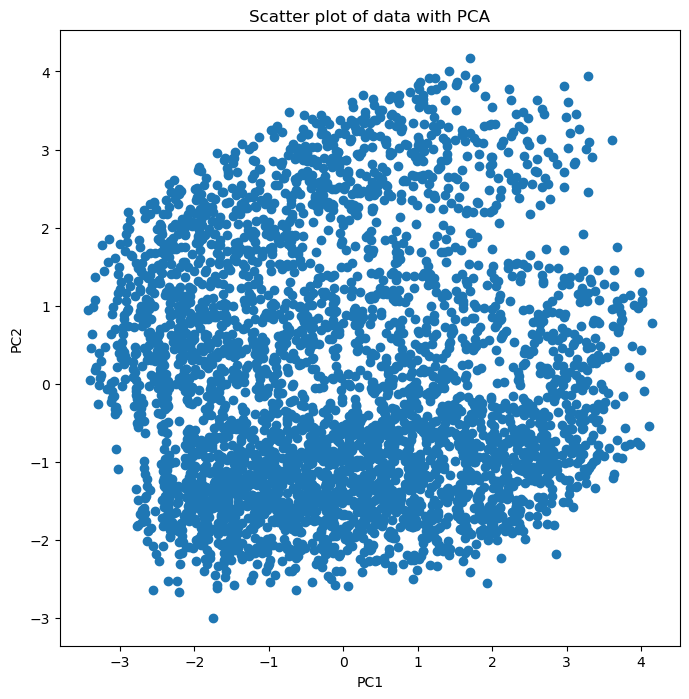

In [56]:
## Visualize the principal components

plt.figure(figsize=(8,8))

plot = plt.scatter(xpca[:,0], xpca[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter plot of data with PCA")
plt.show()

#### Observation 
The visual sshows an overlap in the data and thus, K-means is more suitable to do clustering

34519.36821581245

#### b) K-Means Clustering:Use the elbow method to choose a proper value for K. Then, apply the K-Means model to cluster investors. Compute the number of investors in each cluster.

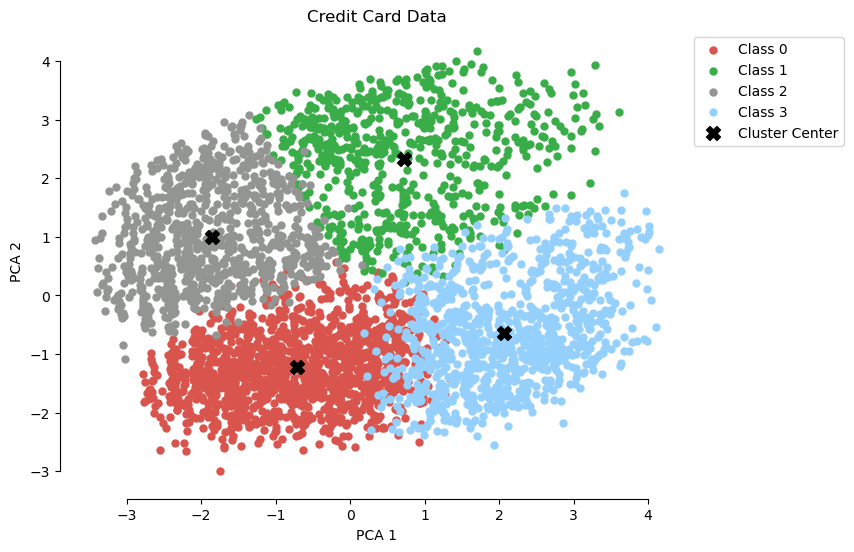

In [105]:

# Initialize KMeans model with 4 clusters
km = KMeans(n_clusters=4, random_state=666)

# Fit KMeans model to the data
km.fit(x)

# Predict cluster labels for each data point
y_pred = km.predict(x)

# Principal Component Analysis (PCA)
# Initialize PCA model with 2 components
pca = PCA(n_components=2, random_state=666)

# Fit PCA model to the data and transform it
xpca = pca.fit_transform(x)

# concatenates the PCA-transformed features (xpca) with the predicted cluster labels (y_pred)
# this way, we predict the clusters for all the rows in the reduced dataset
data = np.concatenate((xpca, y_pred.reshape(x.shape[0], 1)), axis=1)

# Create DataFrame from the concatenated data and make it a dataframe
cols = ['PCA1', 'PCA2', 'Class']
pc = pd.DataFrame(data, columns=cols)

# Compute cluster centers in the PCA space
cc = km.cluster_centers_
cc_pca = pca.transform(cc)

# Define colors and labels for clusters (we chose 4 clusters)
pclr = [sns.xkcd_rgb['pale red'], 
        sns.xkcd_rgb['medium green'],
        sns.xkcd_rgb['grey'],
        sns.xkcd_rgb['light blue']]
plbls = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

# Visualize Predicted Clusters
# Create plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each cluster separately
for idx in range(4):
    # Plot assigned cluster as small point
    tmp_pdf = pc[pc['Class'] == idx]
    ax.scatter(tmp_pdf['PCA1'], tmp_pdf['PCA2'], 
               color=pclr[idx], label=plbls[idx], alpha=1, s=25)

# Plot cluster centers
ax.scatter(cc_pca[:,0], cc_pca[:,1], 
           s=100, c='k', marker='X', 
           label='Cluster Center')

# Decorate Plot
ax.set(title='Credit Card Data', xlabel='PCA 1', ylabel='PCA 2')
ax.legend(bbox_to_anchor=(1.0, 1), loc=2)
sns.despine(offset=5, trim=True)


In [106]:
# Calculate the inertia of the 4 clusters 
km.inertia_

34519.36821581245

#### How many data points make up the clusters? 


In [107]:
from collections import Counter 
cnt =  Counter(np.sort(y_pred))
cnt

Counter({0: 1387, 1: 648, 2: 828, 3: 1003})

#### Whats the inertia of the clusters?

In [70]:
km.inertia_

34519.36821581246

#### Find the optimum number of clusters using Elbow Method to choose K

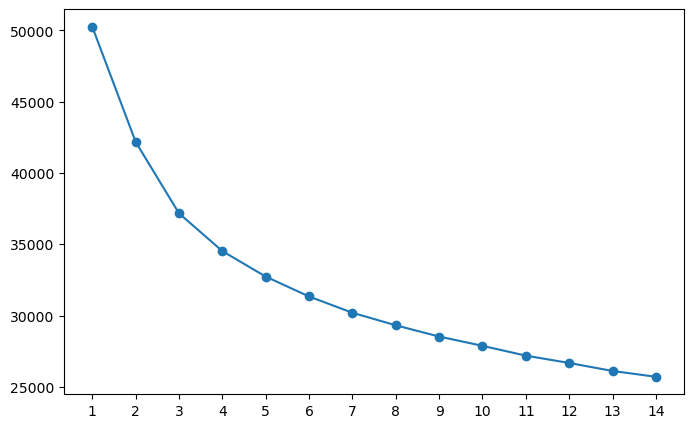

In [73]:
# To ignore several specific warnings
import warnings
warnings.filterwarnings("ignore")

n_clusters = np.arange(1,15) # investigate from 1 - 15 clusters
inertia = np.zeros(n_clusters.shape[0])

for idx, nc in enumerate(n_clusters):
    model = KMeans(n_clusters=nc, random_state=666)
    model.fit(x)
    inertia[idx] = model.inertia_
    
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(n_clusters,inertia)
ax.plot(n_clusters,inertia)
ax.set_xticks(range(1,15,1))

### Observation 
Anything inbetween 4 and 6 clusters should be fine. We will try. After plugging in 5 and 6 clusters above respectively, 4 is the optimumum number of clusters for this data

In [86]:
#### Look at the corresponding inertia values

# Create a DataFrame
inertia_df = pd.DataFrame({'Number of Clusters': n_clusters, 'Inertia': inertia})
inertia_df.round(2)
# inertia_df.min() # smallest inertia value

,Number of Clusters,Inertia
0,1,50258.00
1,2,42182.99
2,3,37170.71
3,4,34519.37
4,5,32730.81
5,6,31335.15
6,7,30194.62
7,8,29313.35
8,9,28525.48
9,10,27873.20


#### Analyze the characteristics of each cluster and visualize them

In [95]:
km = KMeans(n_clusters=4, random_state=101)
km.fit(x)
y_pred = km.predict(x)
df['cluster']= y_pred
df.sample(5)

,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL,cluster
966,967,3,2,2,1,4,1,4,1,3,5,2,3,1
3780,3781,4,1,1,0,5,1,3,0,3,5,2,3,2
2130,2131,3,3,1,0,2,2,2,1,3,1,5,5,3
1006,1007,4,1,2,1,5,1,4,1,1,2,3,2,2
1600,1601,3,4,2,0,1,1,1,0,1,3,5,5,3


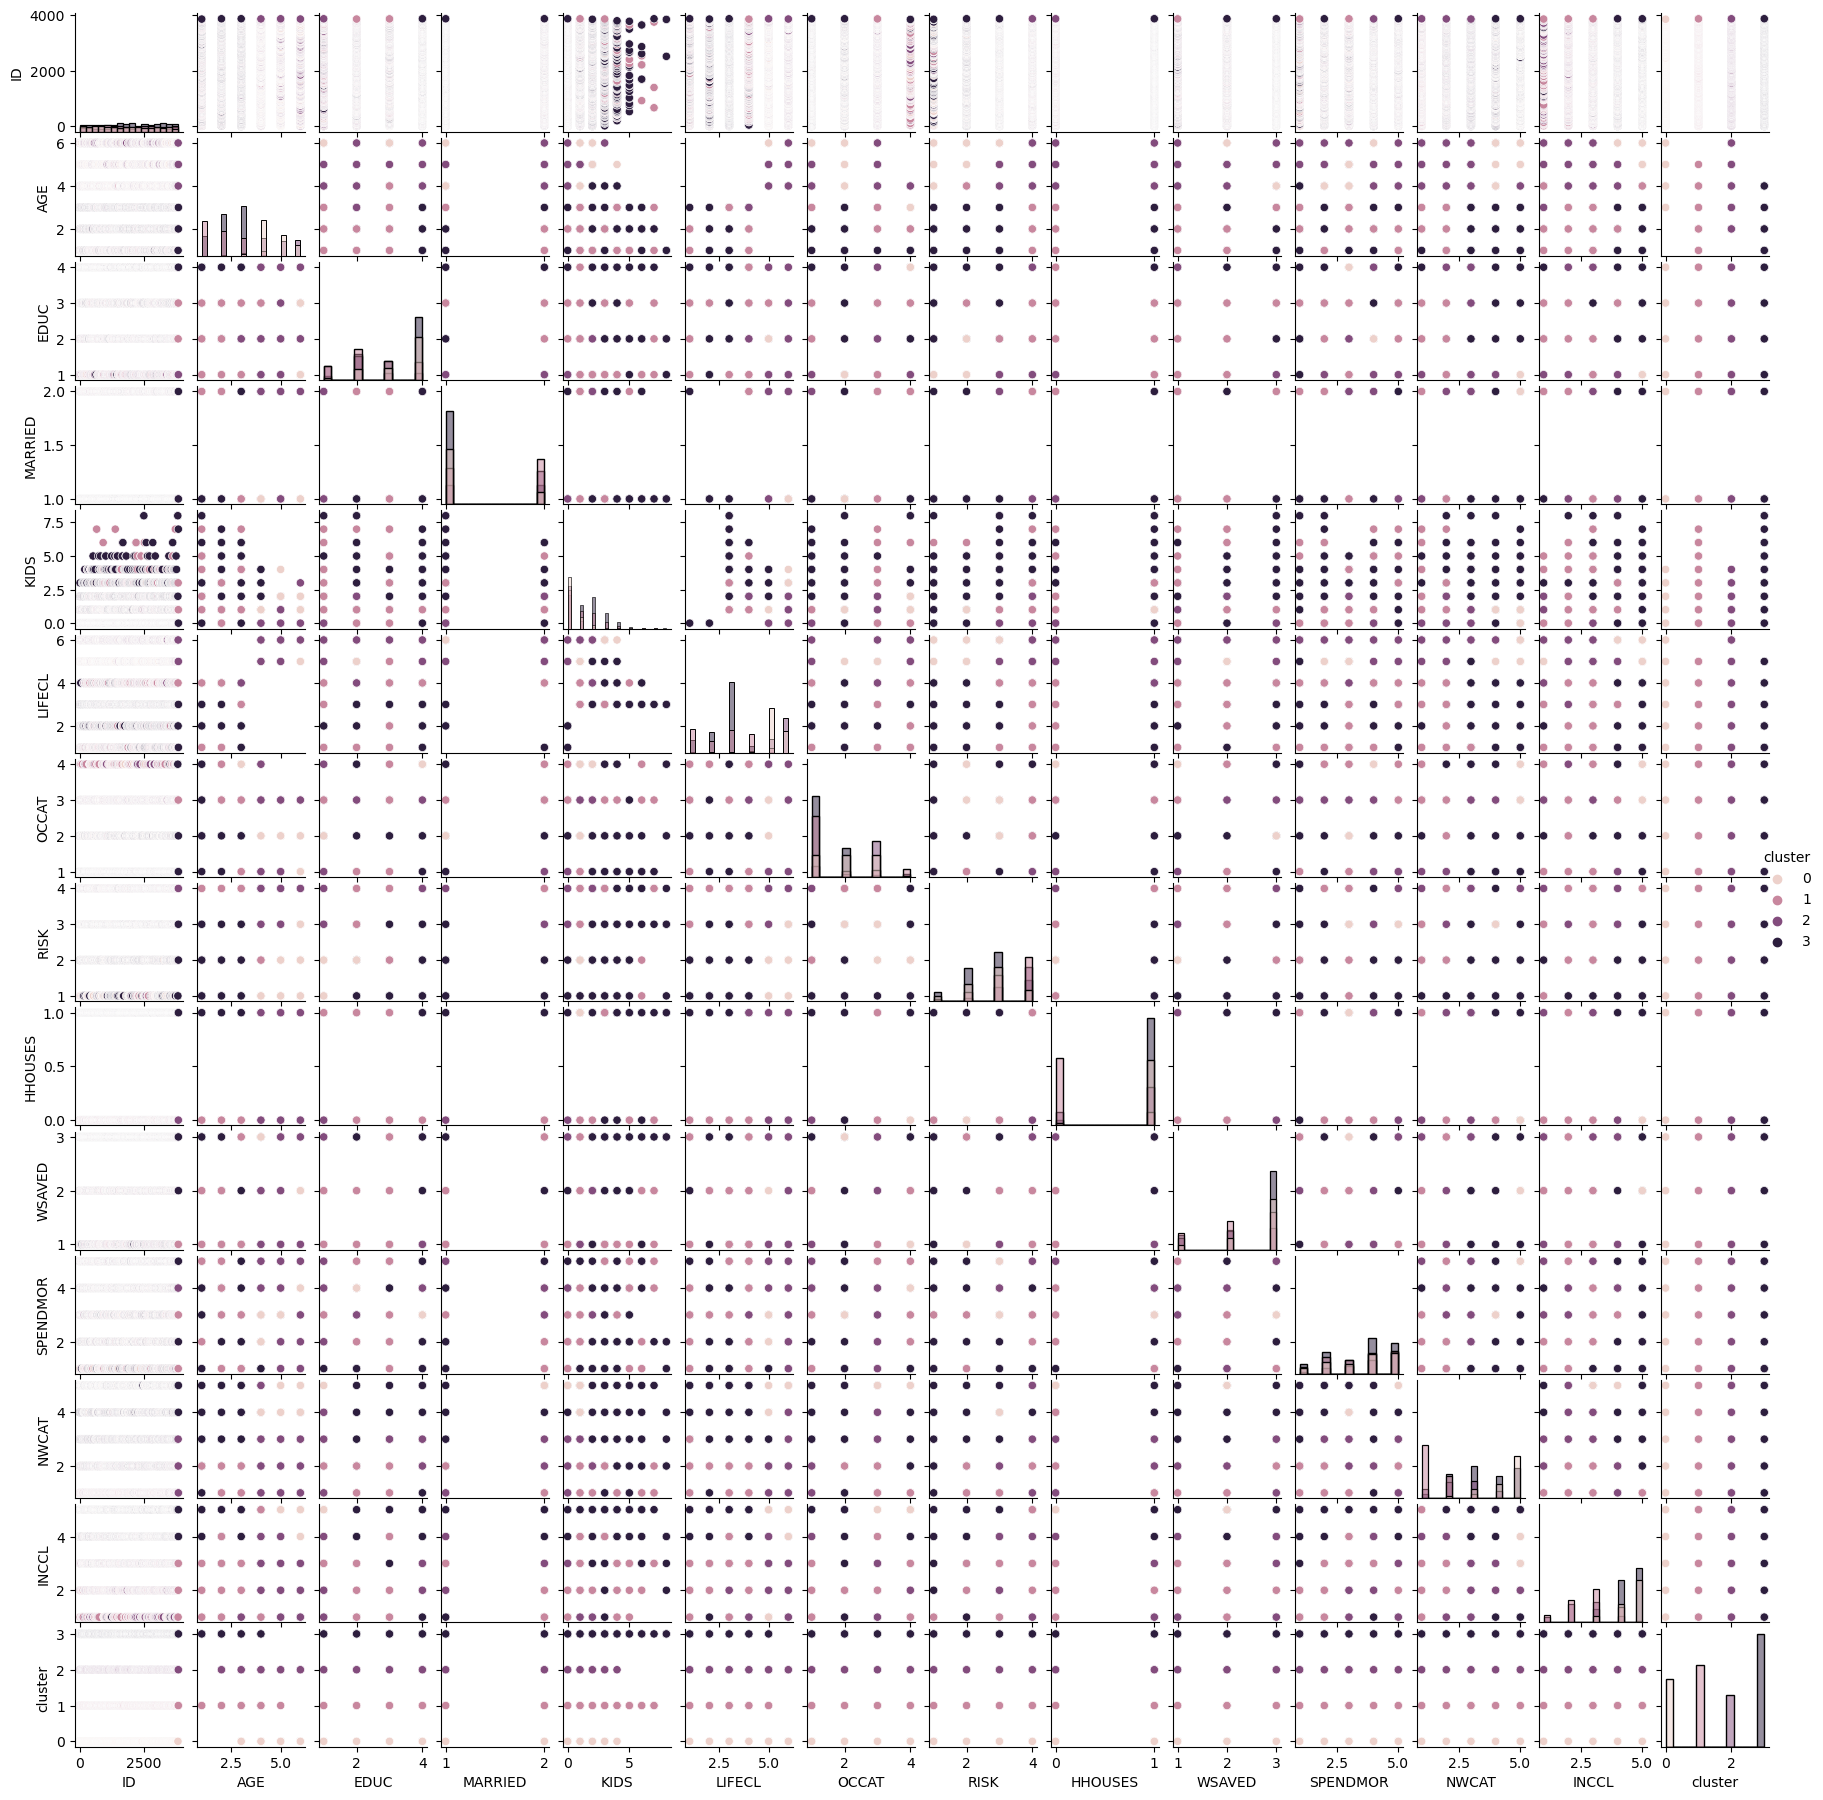

In [97]:
### Visualize clusters
grid = sns.pairplot(df, vars=df.columns, hue='cluster', diag_kind='hist')
grid.fig.set_size_inches(18,18)

### K-Means performance evaluation

In [108]:
ss = silhouette_score(x, y_pred)
print (f'Silhouette Score: {ss:.3f}')

Silhouette Score: 0.128


#### c) DBSCAN: Use the k-distance graph to pick a reasonable value for epsilon. Then, pick a reasonable value for MinPts and apply the DBSCAN model to cluster investors. Compute the number of investors in each cluster.

##### Observation
Given the PCA visual above, DBSCAN would recommend 1 cluster given the density and overlapping of the data

In [110]:
df.columns

Index(['ID', 'AGE', 'EDUC', 'MARRIED', 'KIDS', 'LIFECL', 'OCCAT', 'RISK',
       'HHOUSES', 'WSAVED', 'SPENDMOR', 'NWCAT', 'INCCL', 'cluster'],
      dtype='object')

In [111]:
db = DBSCAN(eps=0.5, min_samples=24) #rule of thumb for min_samples=2 * # of features
db.fit(x)

db.components_ #An array containing the core points
print(f'Number of core points = {db.components_.shape[0]}')
print(f'Cluster labels: {np.unique(db.labels_)}') # label -1 indicates noise points

Number of core points = 0
Cluster labels: [-1]


In [112]:
from collections import Counter 
cnt =  Counter(np.sort(db.labels_))
cnt

Counter({-1: 3866})

Text(0, 0.5, 'Distance')

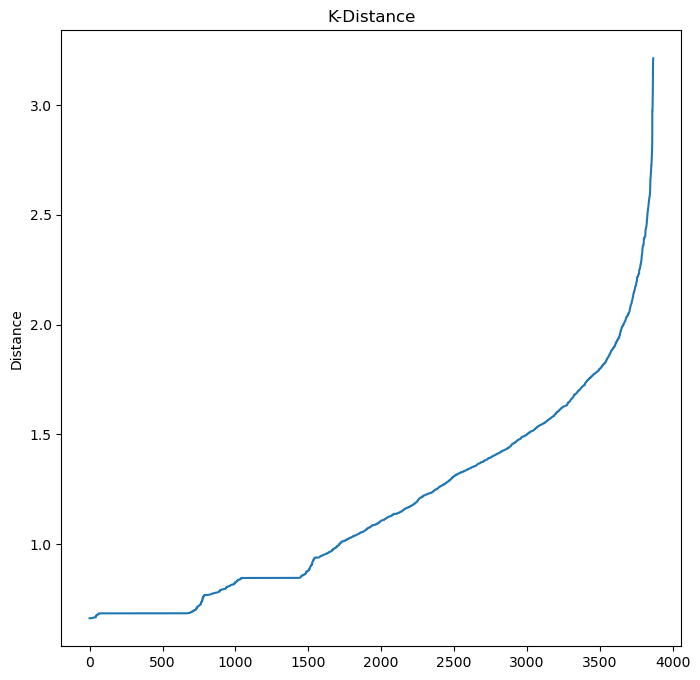

In [113]:
from sklearn.neighbors import NearestNeighbors

#get nearest neighbor of each points
nn = NearestNeighbors(n_neighbors=2)
nn.fit(x)

#calculate distances to the neighbor of each point
dist, indices = nn.kneighbors(x)
dist = dist[:,1]

#sort by distance from low to high and plot
dist = np.sort(dist)

fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(dist)
plt.title("K-Distance")
plt.ylabel("Distance")

In [114]:
db = DBSCAN(eps=0.6, min_samples=10)
db.fit(x)
Counter(np.sort(db.labels_))

Counter({-1: 3866})

In [119]:
# Check the number of unique labels assigned by the clustering algorithm
unique_labels = np.unique(db.labels_)

if len(unique_labels) <= 1:
    print("Error: Only one cluster is being assigned. Adjust clustering parameters or check your data.")
else:
    # Calculate silhouette score only if there are more than one cluster
    silhouette_score_value = silhouette_score(x, db.labels_)
    print(f'Silhouette Score: {silhouette_score_value:.3f}')


Error: Only one cluster is being assigned. Adjust clustering parameters or check your data.


#### d) Compare the evaluation metric (the Silhouette score) for the K-Means and the DBSCAN clustering in parts b and c. Which model performs a better clustering?